<a href="https://colab.research.google.com/github/omerahmed12345elhussien/GDA_Live_coding_FML23/blob/main/Omer_Elhussien_GDA_live_coding_21_march.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GDA Implementation.

Implement the Gaussian Discriminant Analysis (GDA) learning algorithm following the steps as discussed in class.

INSTRUCTION: Rename your notebook as: <br>
`firstName_LastName_Live_coding_GDA.ipynb`.

Notes: 
* Do not use any built-in functions to complete a task;
* Do not import additional libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [2]:
# Generate data
def generate_data():
  x, y = make_classification(n_samples= 1000, n_features=3, n_redundant=0, 
                           n_informative=3, random_state=1, 
                           n_clusters_per_class=1)
  
  return x,y

x,y= generate_data() # get data
print(x.shape, y.shape)

(1000, 3) (1000,)


In [4]:
np.random.seed(0)

In [5]:
def split_data(x,y, train_size= 0.8):
  """
  split_data(x,y, train_size= 0.8) accepts x, y, and train_size
  It returns x,y splitted to train and test according to train_size
  """
  # shuffle the data to randomize the train/test split
  data_size=x.shape[0]
  idx=np.random.permutation(data_size)
  x=x[idx]
  y=y[idx]
  train_val=round(train_size*data_size)
  x_train,y_train=x[0:train_val,:],y[0:train_val]
  x_test,y_test=x[train_val:,:],y[train_val:]
  return x_train,x_test,y_train,y_test


In [23]:
def add_ones(x):
  return np.insert(x,0,1,axis=1)

In [6]:
X_train, X_test, y_train, y_test= split_data(x,y) # split your data into x_train, x_test, y_train, y_test
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(800, 3) (800,) (200, 3) (200,)


In [7]:
def covariance(x, mu):
  # Easy way: cov= np.cov(x, rowvar=0) but do not use it. One can use it to assess his/her result.
  m,d=x.shape
  k=mu.shape[0]
  resl_cov=np.zeros((k,d,d))
  for cla_num in range(k):
    for num_col1 in range(d):
      for num_col2 in range(d):
        resl_cov[cla_num][num_col1,num_col2]=(1/(m-1))*np.sum( (x[:,num_col1].reshape(-1,1)-mu[cla_num,num_col1])*(x[:,num_col2].reshape(-1,1)-mu[cla_num,num_col2])    )
  return resl_cov

In [8]:
mean1=np.mean(x,axis=0);mean1=mean1.reshape(1,-1)

In [9]:
np.cov(x,rowvar=False)

array([[1.84495325, 0.02790646, 1.00137533],
       [0.02790646, 1.00170721, 0.05539176],
       [1.00137533, 0.05539176, 1.74832   ]])

In [10]:
covariance(x,mean1)

array([[[1.84495325, 0.02790646, 1.00137533],
        [0.02790646, 1.00170721, 0.05539176],
        [1.00137533, 0.05539176, 1.74832   ]]])

In [11]:
def multiv_gauss(x,mu,sigma):
  x=x.reshape(1,-1)
  d=mu.shape[0]
  val_1=np.linalg.det(sigma)**0.5
  val_2=(2*np.pi)**(d/2)
  val_3=np.exp(-0.5*(x-mu)@np.linalg.inv(sigma)@(x-mu).T  )
  z1=(1/(val_1*val_2) )*val_3
  return z1.reshape(-1,1)

In [12]:
class GDA:
  def __init__(self):
    ## set mu, phi and sigma to None
    self.mu= None
    self.sigma= None
    self.phi= None
    
  def fit(self,x,y):
    k=np.unique(y).shape[0] # Number of class.
    d=x.shape[1]  # input dim
    m= x.shape[0] # Number of examples.
    
    ## Initialize mu, phi and sigma
    self.mu= np.zeros((k,d))#: kxd, i.e., each row contains an individual class mu.
    self.sigma= np.zeros((k,d,d))#: kxdxd, i.e., each row contains an individual class sigma.
    self.phi= np.zeros((k,1))# k-dimension
    #label_valu=np.unique(y)

    ## START THE LEARNING: estimate mu, phi and sigma.
    for class_num in range(k):
      ##Calculating Phi
      self.phi[class_num,0]=y_train[y==class_num].shape[0]/y.shape[0]
      idx=np.where(y==class_num)
      ##Caculating mu
      self.mu[class_num]=np.mean(x[idx],axis=0)
      ##Caculating Sigma
      self.sigma[class_num]=covariance(x, self.mu[class_num].reshape(1,-1))
    
    
  def predict_proba(self,x):
    # reshape or flatt x.
    n=x.shape[0]
    d= self.mu.shape[1]
    k_class=self.mu.shape[0] # Number of classes we have in our case it's k = 2
    det_sigma=0
    y_pred=np.zeros((n,k_class))
    for i in range(k_class):
      det_sigma=np.linalg.det(self.sigma[i])**0.5
      inv_sigma=np.linalg.inv(self.sigma[i])
      for j in range(n):
        val_2=(2*np.pi)**(d/2)
        val_3=np.exp(-0.5*(x[j].reshape(1,-1)-self.mu[i].reshape(1,-1))@inv_sigma@(x[j].reshape(1,-1)-self.mu[i]).reshape(1,-1).T  )
        z1=(1/(det_sigma*val_2) )*val_3
        y_pred[j,i]=z1*self.phi[i]
    return y_pred

    ## START THE LEARNING: estimate mu, phi and sigma.

  def predict(self,x):
    y_pred=self.predict_proba(x)
    y_res=np.argmax(y_pred,axis=1)
    return y_res
  
  def accuracy(self, y, ypreds):
    acc=np.mean(y==ypreds)*100
    return acc

In [13]:
model= GDA()
model.fit(X_train,y_train)

In [14]:
model.mu

array([[ 1.02275133,  1.04572584,  1.00413266],
       [-0.98392793,  0.97138702, -0.92252973]])

In [15]:
model.phi

array([[0.51],
       [0.49]])

In [16]:
model.sigma

array([[[2.78583678, 0.03864649, 1.92964772],
        [0.03864649, 0.98935083, 0.07950682],
        [1.92964772, 0.07950682, 2.62243381]],

       [[2.86647281, 0.04163371, 2.00706837],
        [0.04163371, 0.98946149, 0.08237492],
        [2.00706837, 0.08237492, 2.69676728]]])

In [17]:
yproba= model.predict_proba(X_test)
yproba

array([[2.49750663e-03, 1.20875369e-02],
       [9.26930267e-04, 3.11908708e-03],
       [9.30518423e-03, 2.64038083e-03],
       [1.71393978e-03, 7.39199929e-03],
       [1.30131722e-03, 8.77613859e-03],
       [4.95218359e-03, 1.45493142e-02],
       [1.23035834e-02, 6.59724126e-03],
       [7.22695457e-03, 1.16909529e-02],
       [1.27122141e-02, 5.04758484e-03],
       [2.31717523e-03, 3.15927745e-03],
       [1.13657415e-03, 6.23686102e-03],
       [1.06674704e-02, 1.10726942e-02],
       [4.28448864e-03, 1.15375044e-02],
       [7.65597737e-04, 2.19145615e-03],
       [3.69590478e-04, 1.70507796e-04],
       [1.37823207e-03, 3.03719737e-03],
       [6.68637037e-05, 6.00993700e-04],
       [4.57469926e-03, 1.37957920e-02],
       [8.46249380e-04, 1.76366916e-03],
       [3.97367514e-03, 1.38652238e-02],
       [8.08404126e-04, 2.38170181e-03],
       [1.27549862e-02, 4.71680456e-03],
       [3.39172279e-03, 8.27430000e-03],
       [9.35720105e-04, 3.45558281e-03],
       [1.115477

In [18]:
ypreds= model.predict(X_test)
ypreds


array([1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0])

In [30]:
acc_GDA=model.accuracy(y_test, ypreds)

print(acc_GDA)

94.5


In [24]:
class Logistic_Regression:
  # Algorithm has to be replaced, e.g. Linear_regression.
  #######The class Constructor##########
  def __init__(self,arg,lr,n_epoc):
    self.arg= arg
    self.theta=None
    self.lr=lr #10e-5#0.01
    self.n_epoc=n_epoc
    self.training_loss=[]

  #######The class Constructor##########
  def intialize_w(self,x):
    return np.zeros((x.shape[1],1))
  
                  ##############Class methods#################
  #######Set the Batch size##########
  def set_BS(self,x):
    appr_size=int(np.ceil(np.log2(x)))
    self.batch_size=2**appr_size

  #######Set Beta for momentum##########
  def set_Beta(self,x=0.99):
    self.beta=x

  #######Set Eps for termination##########
  def set_Eps(self,eps1=10e-8):
    self.eps=eps1

  #######Sigmoid fun.##########
  def sigmoid(self,x):
    z=x@self.theta
    return 1/(1+np.exp(-z))

  #######Cross_entropy Loss fun.##########
  def cross_entropy(self,y_true,y_pred):
    loss= -np.mean(y_true*np.log(y_pred)+(1-y_true)*np.log(1-y_pred))
    return loss

  #######Gradient of the Loss fun.##########
  def grad_cross_entropy(self,x,y,y_pred):
    return (-1/x.shape[0])*x.T@(y-y_pred )
  
  #######Batch Gradient Descent##########
  def BGD(self,x,y,mom=False): #Batch Gradient Descent
    self.theta=self.intialize_w(x)
    v_0=0
    for num_epoc in range(self.n_epoc):
      # Make predictions
      y_pred=self.sigmoid(x)
      # compute the loss
      loss= self.cross_entropy(y,y_pred)
      # compute the gradient
      dl= self.grad_cross_entropy(x,y,y_pred)
      # Update rules
      if mom==False:
        old_theta=self.theta
        self.theta= self.theta-self.lr*dl
        if np.linalg.norm(old_theta-self.theta)<self.eps:
          break
      else:
        old_theta=self.theta
        v_0=self.beta*v_0+(1-self.beta)*dl
        self.theta=self.theta-self.lr*v_0
        if np.linalg.norm(old_theta-self.theta)<self.eps:
          break
        
      ## APPEND loss
      self.training_loss.append(loss)
      if num_epoc%1000==0:
        print(f"N_epoc is {num_epoc}, with loss {loss}")
    return self.training_loss

  #######Stochastic Gradient Descent##########
  def SGD(self,x,y,mom=False):
    self.theta=self.intialize_w(x)
    v_0=0
    mean_loss=[]
    #break_value=0
    for num_epoc in range(self.n_epoc):
      idx=np.random.permutation(x.shape[0])
      for j in range(x.shape[0]):
        x_valu=x[idx[j],:].reshape(1,-1)
        y_valu=y[idx[j],:].reshape(-1,1)
        # Make predictions
        y_pred=self.sigmoid(x_valu)
        # compute the loss
        loss=self.cross_entropy(y_valu,y_pred)
        # compute the gradient
        dl=self.grad_cross_entropy(x_valu,y_valu,y_pred)
        # Update rules
        if mom==False:
          old_theta=self.theta
          self.theta= self.theta-self.lr*dl
          if np.linalg.norm(old_theta-self.theta)<self.eps:
            break_value=1
            break
        else:
          old_theta=self.theta
          v_0=self.beta*v_0+(1-self.beta)*dl
          self.theta=self.theta-self.lr*v_0
          if np.linalg.norm(old_theta-self.theta)<self.eps:
            break_value=1
            break

        ## APPEND loss
        mean_loss.append(loss)
      
      if num_epoc%1000==0:
        print(f"N_epoc is {num_epoc}, with loss {loss}")
      self.training_loss.append(np.mean(mean_loss))
      #if break_value==1:
      # break

    return self.training_loss

  #######Mini-Batch Gradient Descent##########
  def MBGD(self,x,y,mom=False):
    self.theta=self.intialize_w(x)
    mean_loss=[]
    v_0=0
    #break_value=0
    for num_epoc in range(self.n_epoc):
      count_0= 0
      mean_loss=[]
      idx=np.random.permutation(x.shape[0])
      x=x[idx]
      y=y[idx]
      while count_0<x.shape[0]:
        count_1=count_0+self.batch_size
        if count_1>x.shape[0]:
          count_1=x.shape[0]
        x_valu=x[count_0:count_1,:]
        y_valu=y[count_0:count_1].reshape(-1,1)
        # Make predictions
        y_pred=self.sigmoid(x_valu)
        # compute the loss
        loss=self.cross_entropy(y_valu,y_pred)
        # compute the gradient
        dl=self.grad_cross_entropy(x_valu,y_valu,y_pred)
        # Update rules
        if mom==False:
          old_theta=self.theta
          self.theta=self.theta-self.lr*dl
          if np.linalg.norm(old_theta-self.theta)<self.eps:
            break_value=1
            break
        else:
          old_theta=self.theta
          v_0=self.beta*v_0+(1-self.beta)*dl
          self.theta=self.theta-self.lr*v_0
          if np.linalg.norm(old_theta-self.theta)<self.eps:
            break_value=1
            break
      
        mean_loss.append(loss)
        count_0=count_1
      if num_epoc%1000==0:
        print(f"N_epoc is {num_epoc}, with loss {loss}")

      self.training_loss.append(np.mean(mean_loss))
      #if break_value==1:
       # break

    return self.training_loss

  #######Fit the model parameters##########
  def fit(self,x,y):
    x=add_ones(x)
    y=y.reshape(-1,1)
    #
    if self.arg==1: #For Gradient descent
      return self.BGD(x,y)
    #
    elif self.arg==2: #For Stochastic Gradient descent
      return self.SGD(x,y)
    #
    elif self.arg==3: #For MBGD
      return self.MBGD(x,y)
    #
    elif self.arg==4: #For GD with Momentum
      return self.BGD(x,y,mom=True)
    #
    elif self.arg==5: #For SGD with Momentum
      return self.SGD(x,y,mom=True)
    #
    elif self.arg==6: #For MBGD with Momentum
      return self.MBGD(x,y,mom=True)
    
  #######Make Prediction##########
  def predict(self,x):
    x=add_ones(x)
    y_pred=self.sigmoid(x)
    y_resl=[1 if p>0.5 else 0 for p in y_pred]
    return y_resl
  
  def accuracy_fun(self,y,y_pred):
    acc_value=np.mean(y==y_pred)*100
    return acc_value
    

## For Mini-Batch Gradient Descent with Momentum

In [25]:
#For MBGD with Momentum
#X_train, X_test, y_train, y_test
modl5=Logistic_Regression(arg=6,lr=0.01,n_epoc=10000) 
modl5.set_Eps()
modl5.set_Beta()
modl5.set_BS(8)
loss_5=modl5.fit(X_train,y_train)

N_epoc is 0, with loss 0.5501623107831122
N_epoc is 1000, with loss 0.11946400995581505
N_epoc is 2000, with loss 0.0748962724808178
N_epoc is 3000, with loss 0.018902429030721382
N_epoc is 4000, with loss 0.09245317404038121
N_epoc is 5000, with loss 0.17325754254346562
N_epoc is 6000, with loss 0.016695603034836956
N_epoc is 7000, with loss 0.020406044993600915
N_epoc is 8000, with loss 0.026922514026016992
N_epoc is 9000, with loss 0.019299474756518116


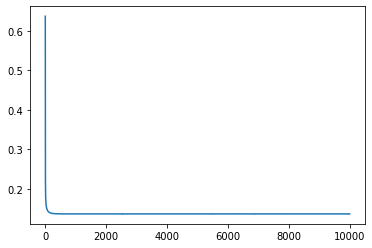

In [26]:
plt.plot(loss_5)
plt.show()

In [29]:
y_pred_train=modl5.predict(X_train)
acc1=modl5.accuracy_fun(y_train,y_pred_train)
print(f"The prediction accuracy is: {acc1}")
print("")
y_pred_test=modl5.predict(X_test)
acc2_logistic=modl5.accuracy_fun(y_test,y_pred_test)
print(f"The prediction accuracy is: {acc2_logistic}")

The prediction accuracy is: 96.0

The prediction accuracy is: 95.0


In [31]:
print(f"The prediction accuracy for Logistic Regression is: {acc2_logistic}")
print(f"The prediction accuracy for  GDA is: {acc_GDA}")

The prediction accuracy for Logistic Regression is: 95.0
The prediction accuracy for  GDA is: 94.5
